In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw=pd.read_csv(r'C:\Users\lenovo\Desktop\IMS PRO\house-prices-advanced-regression-techniques\train.csv')
df_raw_test=pd.read_csv(r'C:\Users\lenovo\Desktop\IMS PRO\house-prices-advanced-regression-techniques\test.csv')

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [4]:
df_raw.shape

(1460, 81)

In [5]:
df_raw_test.shape

(1459, 80)

Taking Log Of Salesprice Because Final Score Will Be Calculated On RMSE Of Difference Of Log Of Pred And Actual Values

In [6]:
df_raw['SalePrice']=np.log(df_raw['SalePrice'])

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df_all = pd.concat([df_raw,df_raw_test], axis=0,sort=True)

In [9]:
display_all(df_all.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,12.247694,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,12.109011,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,12.317167,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,11.849398,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,12.429216,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [10]:
df_all.shape

(2919, 81)

In [11]:
df_all_object=df_all[df_all.select_dtypes(include=[np.object]).columns.tolist()]

In [12]:
display_all(df_all_object.head())

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,NaN,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NaN,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [13]:
df_all_object.isnull().sum().sort_index()/len(df_all_object)

Alley            0.932169
BldgType         0.000000
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinType1     0.027064
BsmtFinType2     0.027407
BsmtQual         0.027749
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000343
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
Fence            0.804385
FireplaceQu      0.486468
Foundation       0.000000
Functional       0.000685
GarageCond       0.054471
GarageFinish     0.054471
GarageQual       0.054471
GarageType       0.053786
Heating          0.000000
HeatingQC        0.000000
HouseStyle       0.000000
KitchenQual      0.000343
LandContour      0.000000
LandSlope        0.000000
LotConfig        0.000000
LotShape         0.000000
MSZoning         0.001370
MasVnrType       0.008222
MiscFeature      0.964029
Neighborhood     0.000000
PavedDrive       0.000000
PoolQC           0.996574
RoofMatl         0.000000
RoofStyle   

In [14]:
missing_df=pd.DataFrame()
missing_df['Columns']=df_all_object.isnull().sum().keys()
missing_df['Values']=df_all_object.isnull().sum().values.tolist()
missing_df[missing_df['Values']>0]

,Columns,Values
0,Alley,2721
2,BsmtCond,82
3,BsmtExposure,82
4,BsmtFinType1,79
5,BsmtFinType2,80
6,BsmtQual,81
10,Electrical,1
13,Exterior1st,1
14,Exterior2nd,1
15,Fence,2348


In [15]:
df_all_object.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [16]:
df_all_object['Alley'] = df_all_object['Alley'].fillna('No Alley')
df_all_object['Fence'] = df_all_object['Fence'].fillna('No Fence')
df_all_object['MiscFeature'] = df_all_object['MiscFeature'].fillna('No Feature')
df_all_object['PoolQC'] = df_all_object['PoolQC'].fillna('No Pool')
df_all_object['FireplaceQu'] = df_all_object['FireplaceQu'].fillna('No Fire Place')

In [17]:
#Filling missing values of df with mode
def Fill_Missing(df):
    for n,c in df.items():        
            df[n] = df[n].fillna(df[n].mode()[0])

In [18]:
def Fill_Missing_Median(df):
    for n,c in df.items():        
            df[n] = df[n].fillna(df[n].median())

In [19]:
Fill_Missing(df_all_object)

In [20]:
#Change any columns of strings in a panda's dataframe to a column of categorical values. This applies the changes inplace
def Change_To_CategoricalValue(df):
    for n,c in df.items():
        if pd.api.types.is_string_dtype(c):
            df[n] = c.astype('category').cat.as_ordered() 

In [21]:
Change_To_CategoricalValue(df_all_object)

In [22]:
df_all_object.dtypes

Alley            category
BldgType         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
BsmtQual         category
CentralAir       category
Condition1       category
Condition2       category
Electrical       category
ExterCond        category
ExterQual        category
Exterior1st      category
Exterior2nd      category
Fence            category
FireplaceQu      category
Foundation       category
Functional       category
GarageCond       category
GarageFinish     category
GarageQual       category
GarageType       category
Heating          category
HeatingQC        category
HouseStyle       category
KitchenQual      category
LandContour      category
LandSlope        category
LotConfig        category
LotShape         category
MSZoning         category
MasVnrType       category
MiscFeature      category
Neighborhood     category
PavedDrive       category
PoolQC           category
RoofMatl         category
RoofStyle   

# Setting New Categories

In [23]:
df_all_object.Alley.cat.categories

Index(['Grvl', 'No Alley', 'Pave'], dtype='object')

In [24]:
df_all_object.Alley.cat.set_categories(['Grvl', 'Pave', 'No Alley'],ordered=True,inplace=True)        

In [25]:
df_all_object.Fence.cat.categories   

Index(['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'No Fence'], dtype='object')

In [26]:
df_all_object.MiscFeature.cat.categories

Index(['Gar2', 'No Feature', 'Othr', 'Shed', 'TenC'], dtype='object')

In [27]:
df_all_object.MiscFeature.cat.set_categories(['Gar2','Othr', 'Shed', 'TenC', 'No Feature'],inplace=True)

In [28]:
df_all_object.PoolQC.cat.categories

Index(['Ex', 'Fa', 'Gd', 'No Pool'], dtype='object')

In [29]:
df_all_object.FireplaceQu.cat.categories

Index(['Ex', 'Fa', 'Gd', 'No Fire Place', 'Po', 'TA'], dtype='object')

In [30]:
df_all_object.FireplaceQu.cat.set_categories(['Ex', 'Fa', 'Gd','Po', 'TA', 'No Fire Place'],inplace=True)

In [31]:
display_all(df_all_object.head())

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,No Alley,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,No Fire Place,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,No Feature,CollgCr,Y,No Pool,CompShg,Gable,Normal,WD,Pave,AllPub
1,No Alley,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,No Fence,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,No Feature,Veenker,Y,No Pool,CompShg,Gable,Normal,WD,Pave,AllPub
2,No Alley,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,No Feature,CollgCr,Y,No Pool,CompShg,Gable,Normal,WD,Pave,AllPub
3,No Alley,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,No Fence,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,No Feature,Crawfor,Y,No Pool,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,No Alley,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,No Feature,NoRidge,Y,No Pool,CompShg,Gable,Normal,WD,Pave,AllPub


In [32]:
#Converting categorical features df to categorical codes And Dummies
def Change_To_Categoricalcodes(df):
    for n,c in df.items():
        df[n]=c.cat.codes

In [33]:
Change_To_Categoricalcodes(df_all_object)

In [34]:
display_all(df_all_object.head())

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,2,0,3,3,2,5,2,1,2,2,4,4,2,12,13,4,5,2,6,4,1,4,1,1,0,5,2,3,0,4,3,3,1,4,5,2,3,1,1,4,8,1,0
1,2,0,3,1,0,5,2,1,1,2,4,4,3,8,8,4,4,1,6,4,1,4,1,1,0,2,3,3,0,2,3,3,2,4,24,2,3,1,1,4,8,1,0
2,2,0,3,2,2,5,2,1,2,2,4,4,2,12,13,4,4,2,6,4,1,4,1,1,0,5,2,3,0,4,0,3,1,4,5,2,3,1,1,4,8,1,0
3,2,0,1,3,0,5,3,1,2,2,4,4,3,13,15,4,2,0,6,4,2,4,5,1,2,5,2,3,0,0,0,3,2,4,6,2,3,1,1,0,8,1,0
4,2,0,3,0,2,5,2,1,2,2,4,4,2,12,13,4,4,2,6,4,1,4,1,1,0,5,2,3,0,2,0,3,1,4,15,2,3,1,1,4,8,1,0


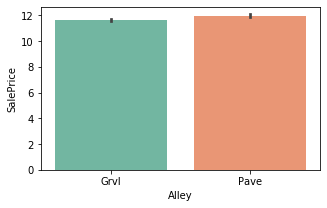

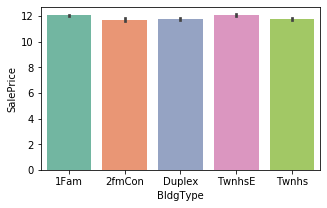

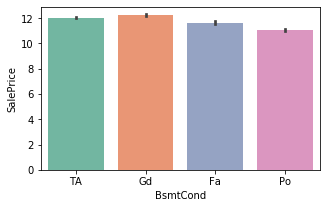

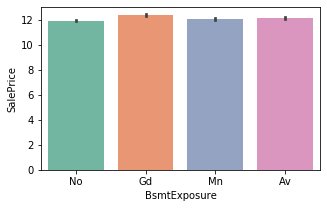

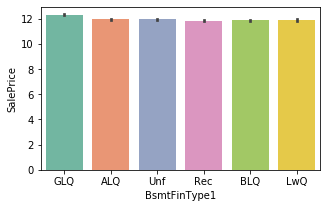

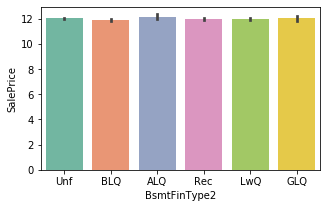

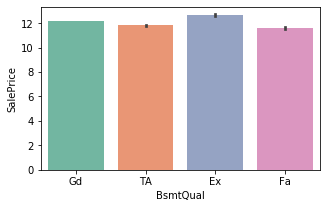

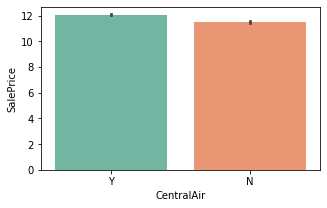

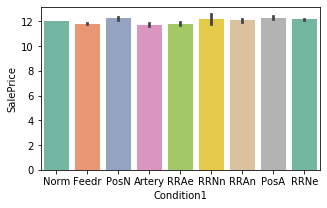

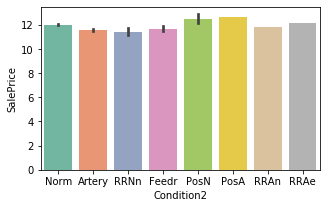

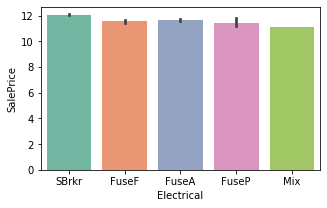

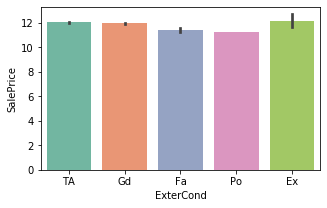

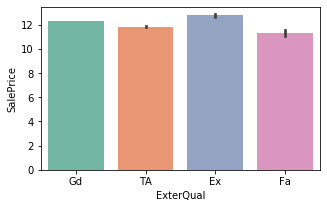

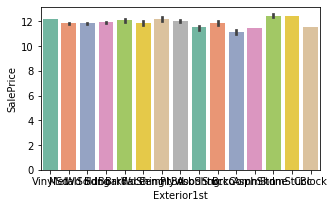

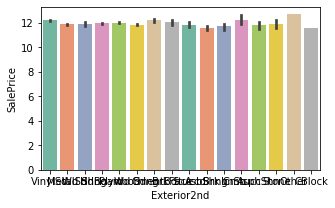

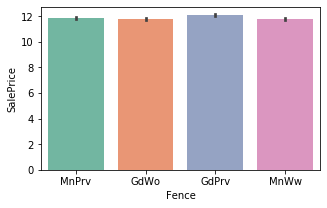

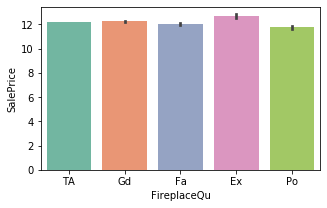

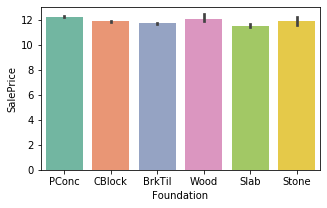

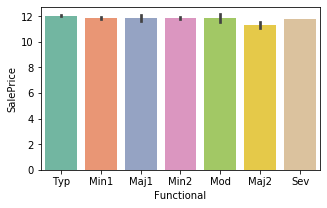

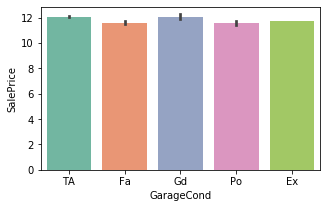

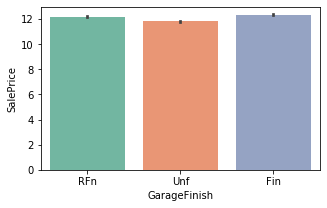

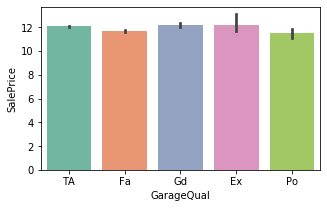

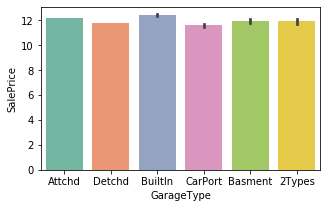

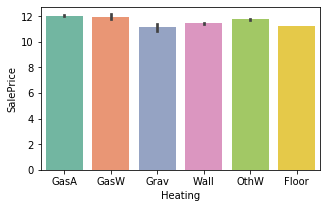

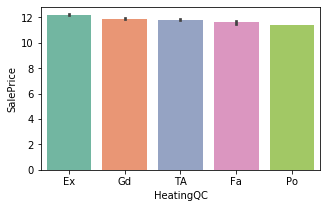

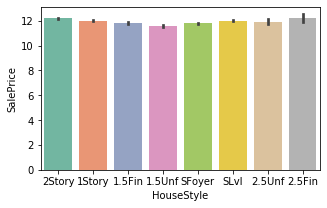

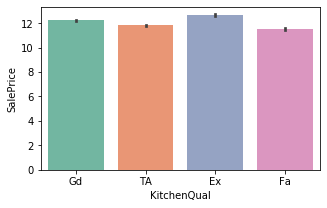

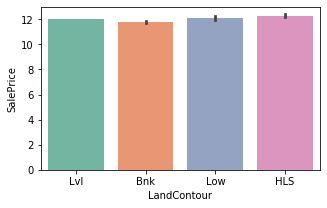

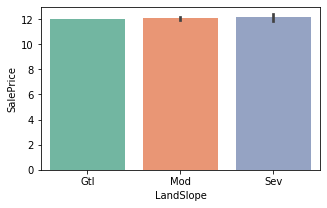

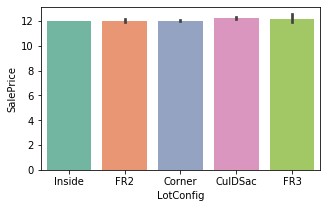

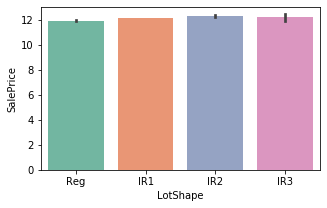

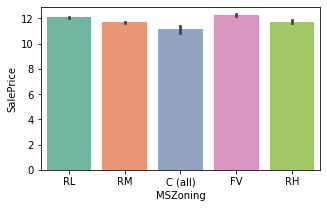

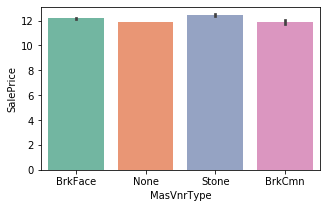

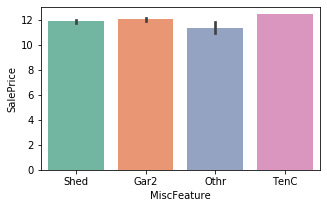

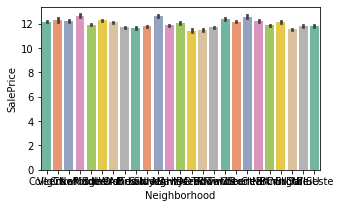

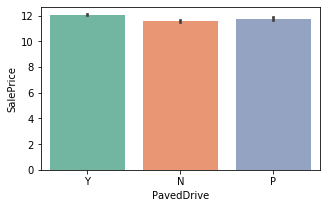

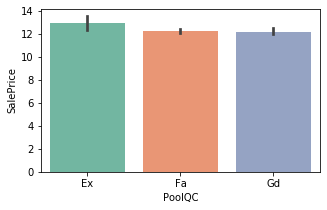

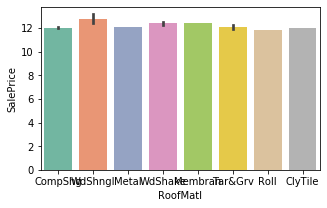

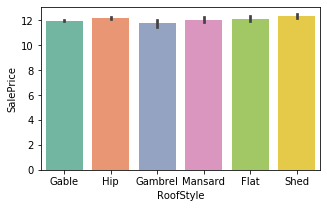

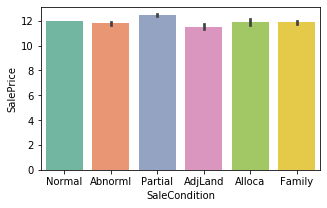

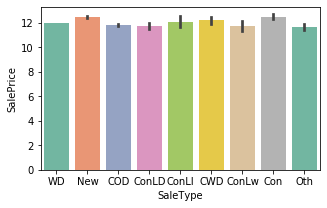

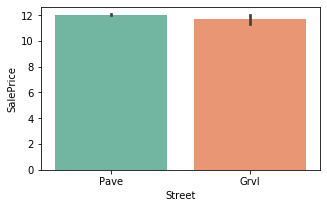

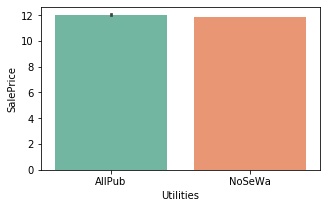

In [35]:
for feature in df_all_object:
    plt.figure(figsize=(5,3))
    sns.barplot(feature,'SalePrice', data=df_all,palette='Set2')

In [36]:
#Seperating all intergral values from dataframe
df_all_num = df_all[df_all.select_dtypes(include=[np.number]).columns.tolist()]

In [37]:
display_all(df_all_num)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,12.247694,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,12.109011,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,12.317167,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,11.849398,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,12.429216,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,0,1,0.0,0.0,NaN,1092,1,2915,1,1936,21.0,0,160,0.0,0,6,0,7,4,0,NaN,0,5,546.0,0,1970,1970,2006
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,0,1,286.0,1.0,1970.0,1092,1,2916,1,1894,21.0,0,160,0.0,0,4,24,5,4,0,NaN,0,6,546.0,0,1970,1970,2006
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,1,1,576.0,2.0,1960.0,1224,0,2917,1,20000,160.0,0,20,0.0,0,9,0,7,5,0,NaN,0,7,1224.0,474,1960,1996,2006
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,0,1,0.0,0.0,NaN,970,0,2918,1,10441,62.0,0,85,0.0,700,7,32,5,5,0,NaN,0,6,912.0,80,1992,1992,2006


In [38]:
df_all_num['YearOld']=df_all_num['YrSold']-df_all_num['YearBuilt']

In [39]:
df_all_num.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage       486
LowQualFinSF        0
MSSubClass          0
MasVnrArea         23
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
YearOld             0
dtype: int64

In [40]:
Fill_Missing_Median(df_all_num)

In [41]:
df_final=pd.concat([df_all_num,df_all_object],axis=1)

In [42]:
display_all(df_final.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,YearOld,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,12.247694,0,8,856.0,0,2003,2003,2008,5,2,0,3,3,2,5,2,1,2,2,4,4,2,12,13,4,5,2,6,4,1,4,1,1,0,5,2,3,0,4,3,3,1,4,5,2,3,1,1,4,8,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,12.109011,0,6,1262.0,298,1976,1976,2007,31,2,0,3,1,0,5,2,1,1,2,4,4,3,8,8,4,4,1,6,4,1,4,1,1,0,2,3,3,0,2,3,3,2,4,24,2,3,1,1,4,8,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,12.317167,0,6,920.0,0,2001,2002,2008,7,2,0,3,2,2,5,2,1,2,2,4,4,2,12,13,4,4,2,6,4,1,4,1,1,0,5,2,3,0,4,0,3,1,4,5,2,3,1,1,4,8,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,11.849398,0,7,756.0,0,1915,1970,2006,91,2,0,1,3,0,5,3,1,2,2,4,4,3,13,15,4,2,0,6,4,2,4,5,1,2,5,2,3,0,0,0,3,2,4,6,2,3,1,1,0,8,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,12.429216,0,9,1145.0,192,2000,2000,2008,8,2,0,3,0,2,5,2,1,2,2,4,4,2,12,13,4,4,2,6,4,1,4,1,1,0,5,2,3,0,2,0,3,1,4,15,2,3,1,1,4,8,1,0


In [43]:
df_final.shape

(2919, 82)

In [44]:
df_Train=df_final.iloc[:1460,:]
df_Test=df_final.iloc[1460:,:]

In [45]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [46]:
df_Train.shape , df_Test.shape

((1460, 82), (1459, 81))

In [47]:
from sklearn.model_selection import train_test_split
X_valid=df_Train.drop(['SalePrice'],axis=1)
y_valid=df_Train['SalePrice']

In [48]:
X_valid_train ,X_valid_test,y_valid_train,y_valid_test=train_test_split(X_valid,y_valid,test_size=0.2)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

xgb_reg=xgb.XGBRegressor()

base_score=[0.25,0.5,0.75,1]
n_estimators = [200, 300, 400, 500, 600]
max_depth = [2, 3, 4, 6, 8]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


random_cv = RandomizedSearchCV(estimator=xgb_reg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [50]:
random_cv.fit(X_valid_train,y_valid_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.4min finished


[18:31:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree'

In [51]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
xgb_reg_final=xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [53]:
xgb_reg_final.fit(X_valid_train,y_valid_train)

[18:31:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [54]:
y_valid_pred=xgb_reg_final.predict(X_valid_test)

In [55]:
import math
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m,y_test,y_pred):
    res = [rmse(y_test, y_pred)]
    print(res)

In [56]:
print_score(xgb_reg_final,y_valid_test, y_valid_pred)

[0.12366695208387027]


# Feature Importance

In [57]:
def feat_importance(m, df):
    return pd.DataFrame({'Columns':df.columns, 'Imp_Features':xgb_reg_final.feature_importances_}
                       ).sort_values('Imp_Features', ascending=False)

In [58]:
Fi=feat_importance(xgb_reg_final,X_valid_train) 
Fi[:20]

,Columns,Imp_Features
13,GarageCars,0.197768
58,GarageFinish,0.085880
37,YearOld,0.071868
15,GrLivArea,0.061368
35,YearRemodAdd,0.059744
28,OverallQual,0.055319
45,CentralAir,0.048751
10,Fireplaces,0.043264
32,TotalBsmtSF,0.041892
44,BsmtQual,0.028453


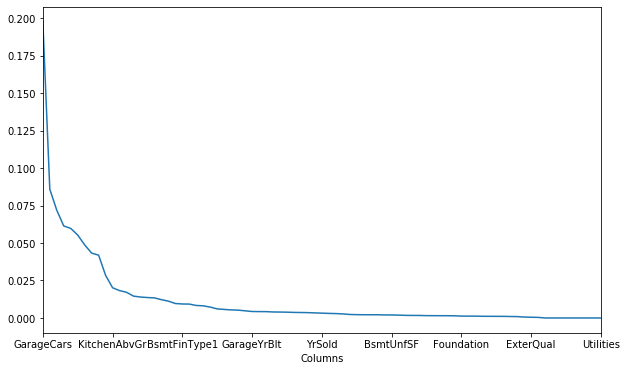

In [59]:
Fi.plot('Columns', 'Imp_Features', figsize=(10,6), legend=False);

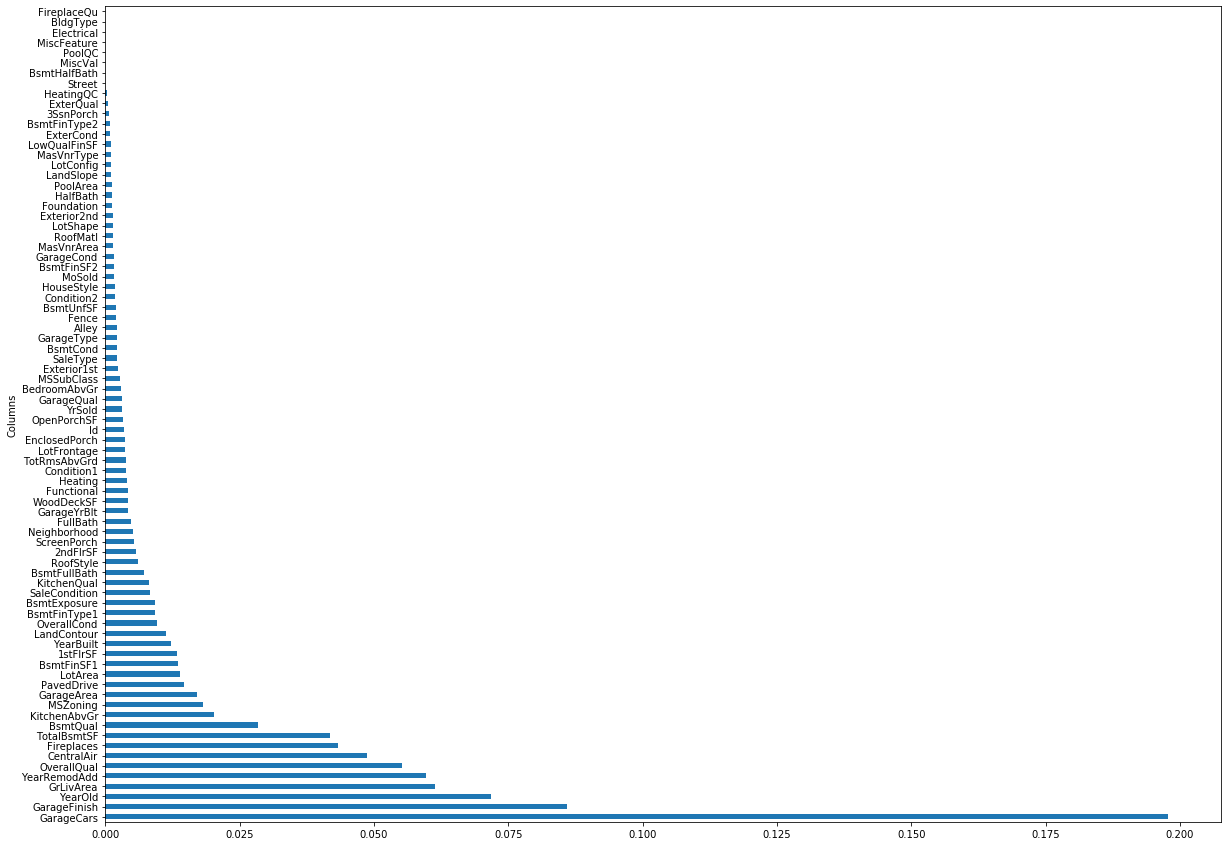

In [60]:
def plot_fi(fi): return fi.plot('Columns', 'Imp_Features','barh', figsize=(20,15), legend=False)
plot_fi(Fi[:80]);

In [61]:
Useless_Features = Fi[Fi.Imp_Features==0].Columns
Usefull_Features=Fi[Fi.Imp_Features>0.010366].Columns 
len(Useless_Features) , len(Usefull_Features)

(9, 19)

# Using RandomForestRegressor With New Features

In [62]:
X_valid=X_valid.drop(Useless_Features,axis=1)
y_valid=df_Train['SalePrice']

In [63]:
X_valid_train ,X_valid_test,y_valid_train,y_valid_test=train_test_split(X_valid,y_valid,test_size=0.2)

n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv2 = RandomizedSearchCV(estimator = RandomForestRegressor(), 
            param_distributions = random_grid, n_iter = 50,
            scoring = 'neg_mean_absolute_error', cv = 5, 
            verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv2.fit(X_valid_train,y_valid_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [64]:
random_cv2.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
m=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
m.fit(X_valid_train,y_valid_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
y_valid_pred2=m.predict(X_valid_test)
print_score(m,y_valid_test, y_valid_pred)

[0.5720704395479492]


# Fitting Model On Final Test Data

In [50]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [51]:
X_test=df_Test

In [52]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.4min finished


[12:39:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree'

In [53]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [54]:
xgb_reg_final=xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:
xgb_reg_final.fit(X_train,y_train)

[12:39:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
y_pred=xgb_reg_final.predict(X_test)

In [57]:
len(y_pred) , len(X_test['Id'])

(1459, 1459)

In [58]:
Final_df=pd.DataFrame()
Final_df['Id']=X_test['Id']
Final_df['SalePrice']=y_pred
Final_df.to_csv(r'C:\Users\lenovo\Desktop\IMS PRO\Final_Submission.csv',index=False)